In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
cd /content/drive/My Drive/DS/Practice/Trafic_Sign

/content/drive/My Drive/DS/Practice/Trafic_Sign


In [ ]:
ls

In [ ]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=2d4732be97fd6a1a006b789cfedc4e4197995a336d5cc2003fbda22bc3453ddb
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget

In [ ]:
wget.download(link)

'traffic-signs-data.zip'

In [4]:
data = "./"

In [ ]:
!unzip -q traffic-signs-data.zip -d $data

In [5]:
#link datasets
train_link =  data + "train.p"
valid_link =  data + "valid.p"
test_link = data + "test.p"

**Import Lib**

In [29]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from numpy import argmax
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator

In [7]:
with open(train_link, mode="rb") as f:
  train = pickle.load(f)
with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)
with open(test_link, mode="rb") as f:
  test = pickle.load(f)

**Prepare data**

In [8]:
#data for train
X_train =  train['features']
y_train =  train['labels']

#data for validation
X_val = valid['features']
y_val = valid['labels']

#data for test
X_test = test['features']
y_test = test['labels']

#Normalize to range 0-1
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test =  X_test.astype('float32') /  255.0

#one hot encode
from keras.utils import np_utils
y_train =  np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test =  np_utils.to_categorical(y_test)

print(X_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799, 43)


**Mapping labels to name labels**

In [9]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

**Visualize some picture**

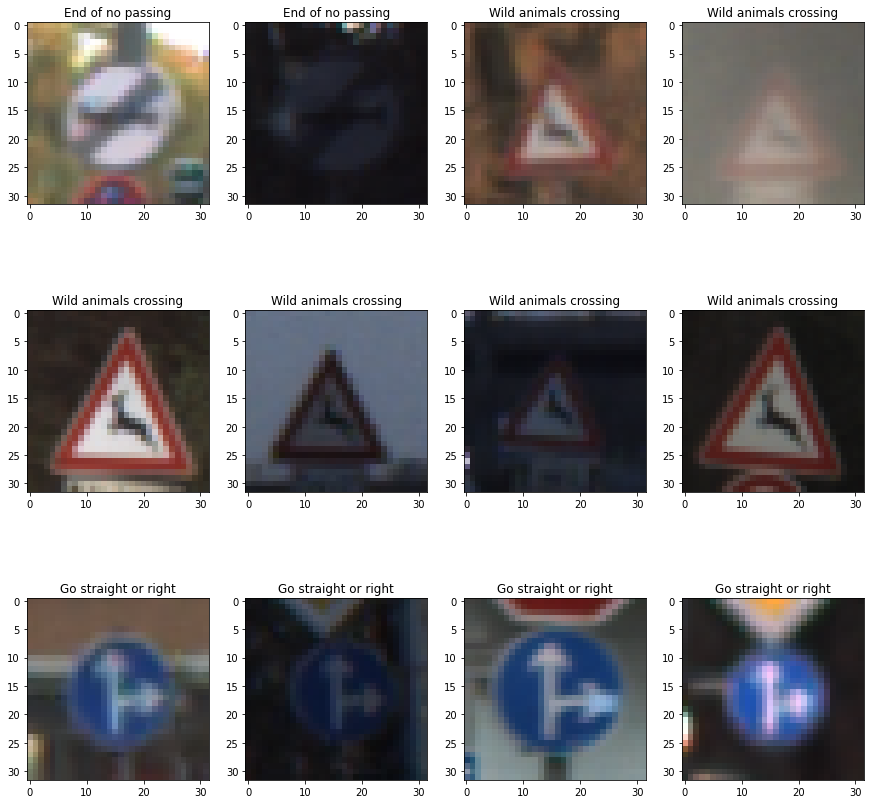

In [14]:
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

for i in range(1, columns*rows +1):
	ax = fig.add_subplot(rows, columns, i)
	plt.title(classNames[np.argmax(y_train[i*100])])
	plt.imshow(X_train[i*100], interpolation='nearest')
plt.show()

**Đảo trật tự ảnh và nhãn**

In [15]:
X_train, y_train = shuffle(X_train, y_train)

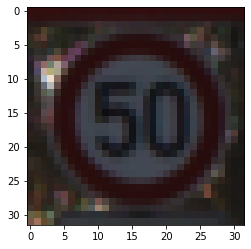

In [16]:
plt.imshow(X_train[2408])

In [18]:
input = (32, 32, 3)
output = y_train[0].shape[0]
print(output)

43


**Define model**

In [19]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(output, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

**Compile model**

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**DataGenerator**

In [21]:
aug = ImageDataGenerator(rotation_range=0.18,
                         zoom_range=0.15,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         horizontal_flip=True)

**Fit model**

In [22]:
N = model.fit_generator(aug.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), steps_per_epoch=X_train.shape[0]//32, epochs=30, verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
1087/1087 [==============================] - 17s 16ms/step - loss: 2.1302 - accuracy: 0.3622 - val_loss: 1.5316 - val_accuracy: 0.5256
Epoch 2/30
1087/1087 [==============================] - 17s 16ms/step - loss: 1.0173 - accuracy: 0.6630 - val_loss: 1.0585 - val_accuracy: 0.6687
Epoch 3/30
1087/1087 [==============================] - 17s 16ms/step - loss: 0.6392 - accuracy: 0.7860 - val_loss: 0.7793 - val_accuracy: 0.7667
Epoch 4/30
1087/1087 [==============================] - 18s 16ms/step - loss: 0.4560 - accuracy: 0.8465 - val_loss: 0.7762 - val_accuracy: 0.8041
Epoch 5/30
1087/1087 [==============================] - 17s 16ms/step - loss: 0.3547 - accuracy: 0.8813 - val_loss: 0.7649 - val_accuracy: 0.8184
Epoch 6/30
1087/1087 [==============================] - 17s 16ms/step - loss: 0.2983 - accuracy: 0.9017 - val_loss: 0.6181 - val_accuracy: 0.8351
Epoch 7/30
1087/1087 [==========================

**Save model**

In [23]:
model.save_weights('My_traffic_sign_model.h5')

**Visualize Loss and Accuracy**

**Load weight**

In [24]:
model.load_weights('My_traffic_sign_model.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


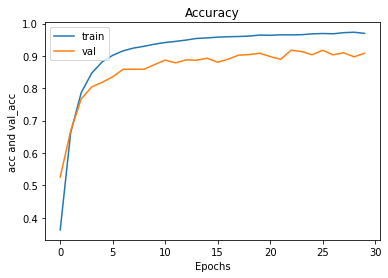

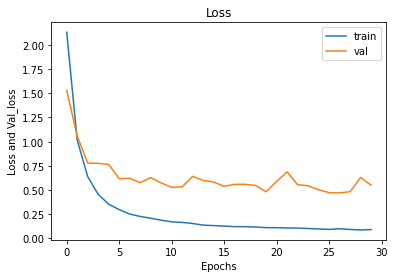

In [25]:
print(N.history.keys())
fig = plt.figure()

#plot accuracy and val_accuracy
plt.plot(N.history['accuracy'])
plt.plot(N.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('acc and val_acc')
plt.title('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure()
#plot loss and val_loss
plt.plot(N.history['loss'])
plt.plot(N.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss and Val_loss')
plt.title('Loss')
plt.legend(['train', 'val'])
plt.show()

**Evaluate Model**

In [26]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print('Accuracy: %.3f' % acc)

395/395 - 1s - loss: 0.3823 - accuracy: 0.9238
Accuracy: 0.924


**Predict**

In [27]:
y_predict = model.predict(X_test)

In [30]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_predict, axis=1))

0.9238321456848773

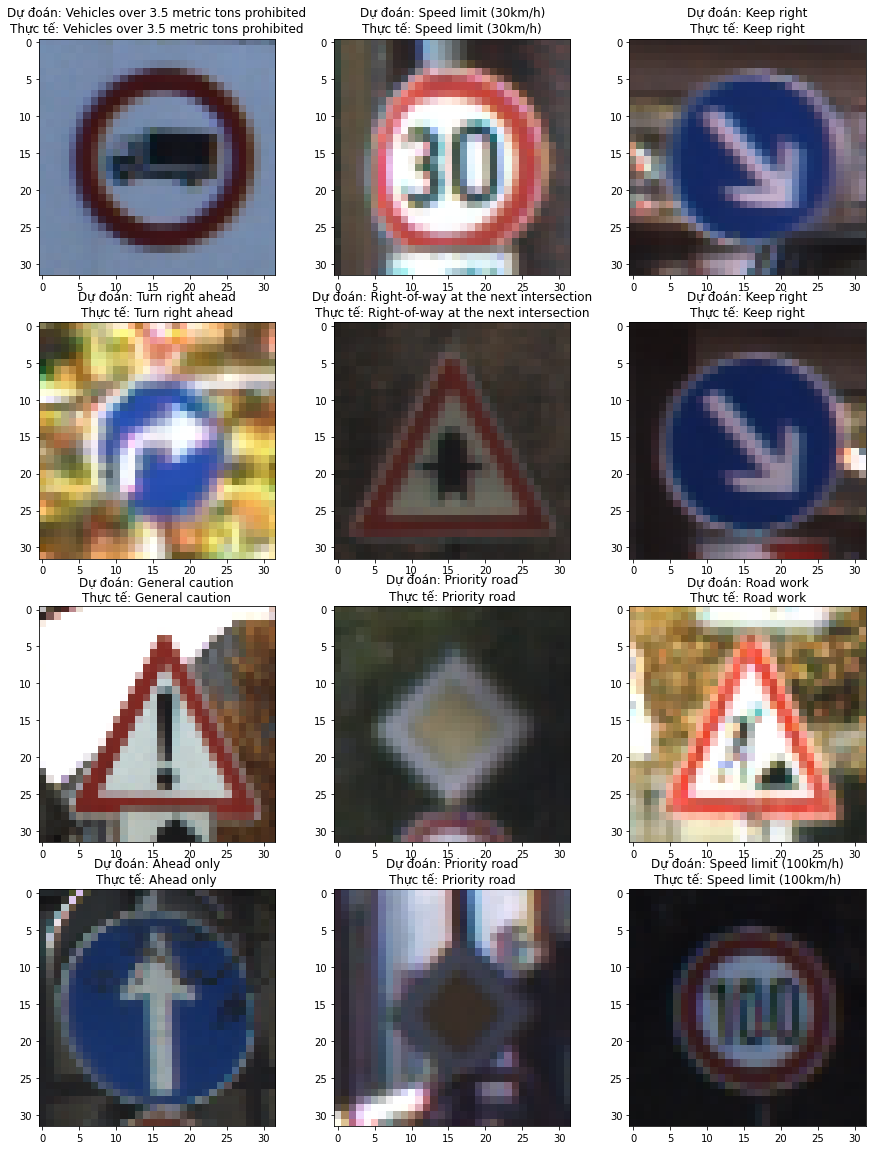

In [28]:
fig=plt.figure(figsize=(15, 20))
columns = 3
rows = 4
    
for i in range(rows*columns):
    ax = fig.add_subplot(rows, columns, i+1)
    plt.title("Dự đoán: "+ classNames[np.argmax(y_predict[i])] +"\n"+"Thực tế: "+ classNames[np.argmax(y_test[i])])
    plt.imshow(X_test[i], interpolation='nearest')
plt.show()

Predict Traffic Sign: Speed limit (50km/h)


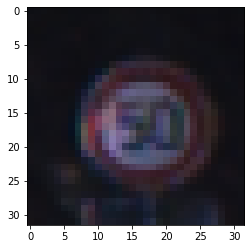

In [37]:
image  = X_test[2408]
plt.imshow(image)
img = np.expand_dims(image, axis=0)
# img = np.vstack([img])
# print(img.shape)
predict = model.predict(img)
print('Predict Traffic Sign: %s' % (classNames[argmax(predict)]))